<a href="https://colab.research.google.com/github/OtabekMamajonov/qiziqish/blob/main/zotlarni_aniqlash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.PETS)

In [5]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [6]:
files = get_image_files(path/'images')

In [7]:
pat = r'^(.*)_\d+.jpg'

In [8]:
dls = ImageDataLoaders.from_path_re(path,files, pat,item_tfms=Resize(224))

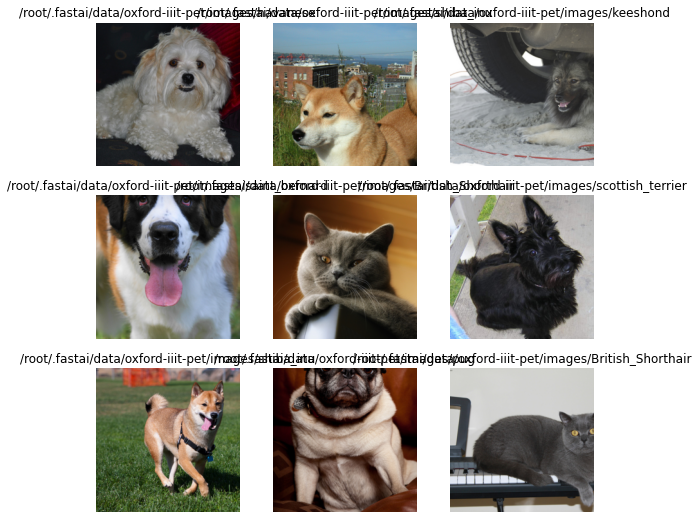

In [9]:
dls.show_batch()

In [10]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

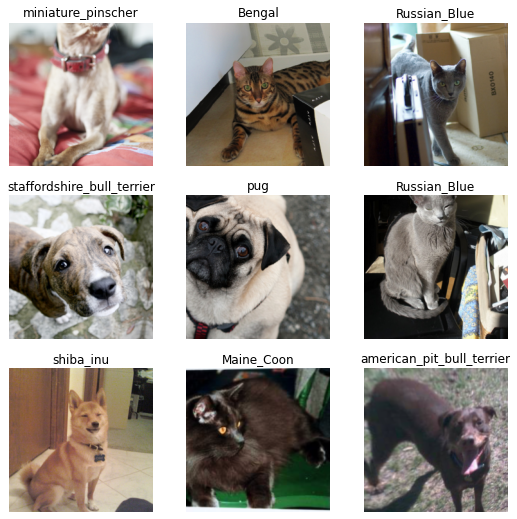

In [11]:
dls.show_batch()

In [12]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0008317637839354575)

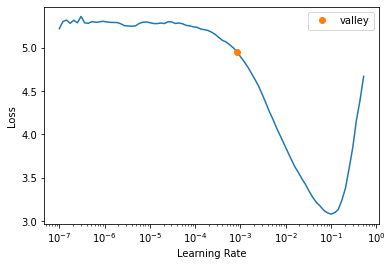

In [13]:
learn.lr_find()

In [14]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.477449,0.307602,0.907307,01:07


epoch,train_loss,valid_loss,accuracy,time
0,0.524728,0.324327,0.893099,01:09
1,0.307995,0.206032,0.928281,01:08


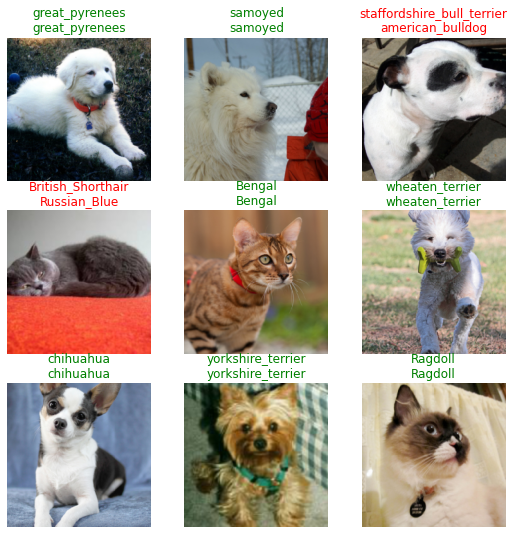

In [15]:
learn.show_results()

In [16]:
interp = Interpretation.from_learner(learn)

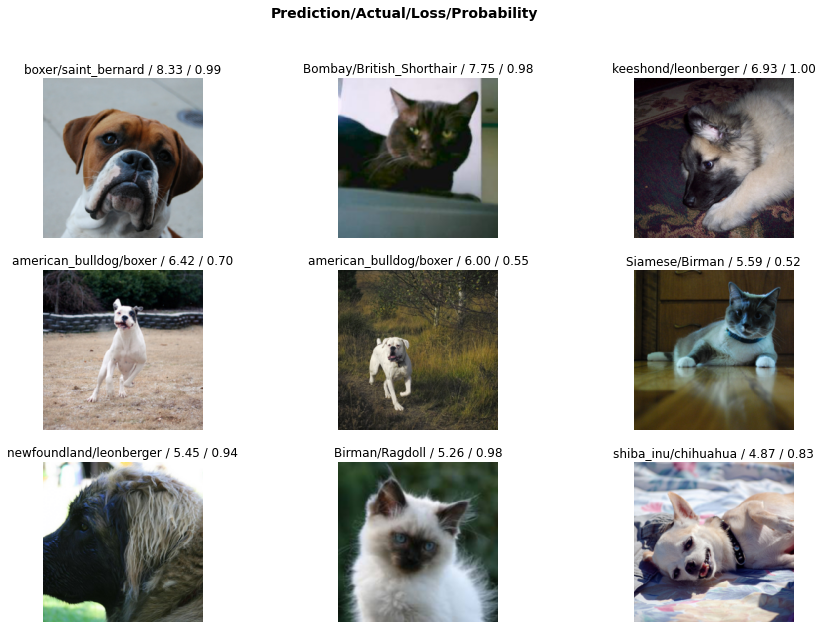

In [17]:
interp.plot_top_losses(9, figsize=(15,10))